<a href="https://colab.research.google.com/github/abdalrahmenyousifMohamed/ML/blob/main/Knn_implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/deepvision-class/starter-code


  Cloning https://github.com/deepvision-class/starter-code to /tmp/pip-req-build-5qoar93y
  Running command git clone --filter=blob:none --quiet https://github.com/deepvision-class/starter-code /tmp/pip-req-build-5qoar93y
  Resolved https://github.com/deepvision-class/starter-code to commit e8d9fe711870a39796a2f8ad95538e57942d756f
  Preparing metadata (setup.py) ... done
  Created wheel for Colab-Utils: filename=Colab_Utils-0.1.dev0-py3-none-any.whl size=10265 sha256=75eafccebc90b337845fc5ec51b5001de311633367a9a32d92fadac1c0b129fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-lg_vr3qm/wheels/c9/fa/82/64b6c443adccf6982835123e4300fc4420373c553439ff0ad5
Successfully built Colab-Utils


In [2]:
import coutils
import torch
import torchvision
import matplotlib.pyplot as plt
import statistics

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 16

In [3]:
x_train, y_train, x_test, y_test = coutils.data.cifar10()

print('Training set:', )
print('  data shape:', x_train.shape)
print('  labels shape: ', y_train.shape)
print('Test set:')
print('  data shape: ', x_test.shape)
print('  labels shape', y_test.shape)

100%|██████████| 170498071/170498071 [00:05<00:00, 29352562.70it/s]


Extracting ./cifar-10-python.tar.gz to .
Training set:
  data shape: torch.Size([50000, 3, 32, 32])
  labels shape:  torch.Size([50000])
Test set:
  data shape:  torch.Size([10000, 3, 32, 32])
  labels shape torch.Size([10000])


In [18]:
# visualize dataset
from torchvision.utils import make_grid
import random

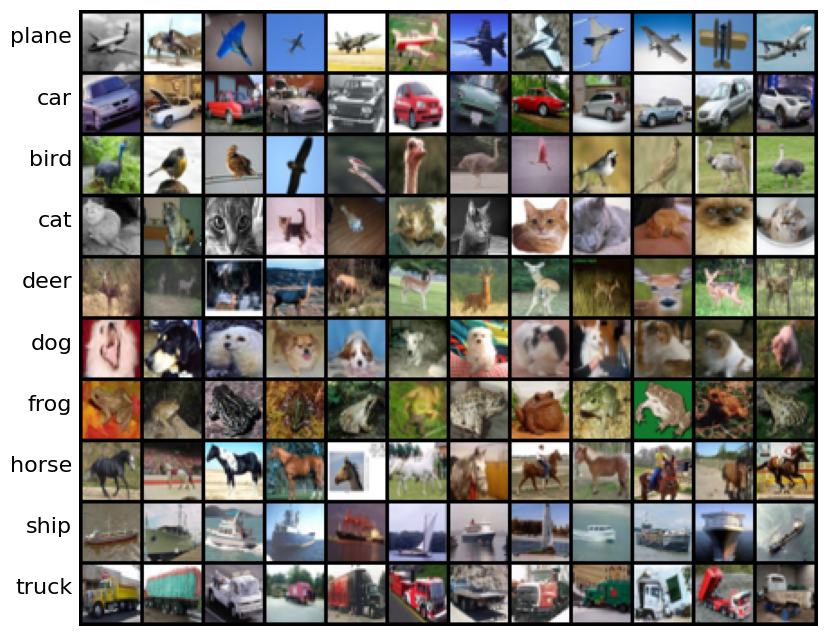

In [23]:
import random
import matplotlib.pyplot as plt
import coutils
from torchvision.utils import make_grid

# Assuming x_train and y_train are the training data and labels from the CIFAR-10 dataset

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 12
samples = []

for y, cls in enumerate(classes):
    plt.text(-4, 34 * y + 18, cls, ha='right')
    idxs = (y_train == y).nonzero().view(-1)
    for i in range(samples_per_class):
        idx = idxs[random.randrange(idxs.shape[0])].item()  # Add () after item to call the function
        samples.append(x_train[idx])

img = make_grid(samples, nrow=samples_per_class)
plt.imshow(coutils.tensor_to_image(img))
plt.axis('off')
plt.show()


In [24]:
help(coutils.data.cifar10)


Help on function cifar10 in module coutils.data:

cifar10(num_train=None, num_test=None)
    Return the CIFAR10 dataset, automatically downloading it if necessary.
    This function can also subsample the dataset.
    
    Inputs:
    - num_train: [Optional] How many samples to keep from the training set.
      If not provided, then keep the entire training set.
    - num_test: [Optional] How many samples to keep from the test set.
      If not provided, then keep the entire test set.
    
    Returns:
    - x_train: float32 tensor of shape (num_train, 3, 32, 32)
    - y_train: int64 tensor of shape (num_train, 3, 32, 32)
    - x_test: float32 tensor of shape (num_test, 3, 32, 32)
    - y_test: int64 tensor of shape (num_test, 3, 32, 32)



In [28]:
def compute_distances_two_loops(x_train, x_test):
  """
  Computes the squared Euclidean distance between each element of the training
  set and each element of the test set. Images should be flattened and treated
  as vectors.

  This implementation uses a naive set of nested loops over the training and
  test data.

  Inputs:
  - x_train: Torch tensor of shape (num_train, C, H, W)
  - x_test: Torch tensor of shape (num_test, C, H, W)

  Returns:
  - dists: Torch tensor of shape (num_train, num_test) where dists[i, j] is the
    squared Euclidean distance between the ith training point and the jth test
    point.
  """
  # Initialize dists to be a tensor of shape (num_train, num_test) with the
  # same datatype and device as x_train
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dists = x_train.new_zeros(num_train, num_test)
  ##############################################################################
  # TODO: Implement this function using a pair of nested loops over the        #
  # training data and the test data.                                           #
  #                                                                            #
  # You may not use torch.norm (or its instance method variant), nor any       #
  # functions from torch.nn or torch.nn.functional.                            #
  ##############################################################################
  # Replace "pass" statement with your code
  for i in range(num_train):
    for j in range(num_test):
      dists[i,j]=torch.dot(x_train[i].view(-1)-x_test[j].view(-1),(x_train[i].view(-1)-x_test[j].view(-1)))
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return dists

In [31]:
num_train , num_test = 500,250

x_train , y_train , x_test , y_test = coutils.data.cifar10(num_train , num_test)
dists = compute_distances_two_loops(x_train , y_train)
print('dists has shape of : ' , dists.shape)

dists has shape of :  torch.Size([500, 500])


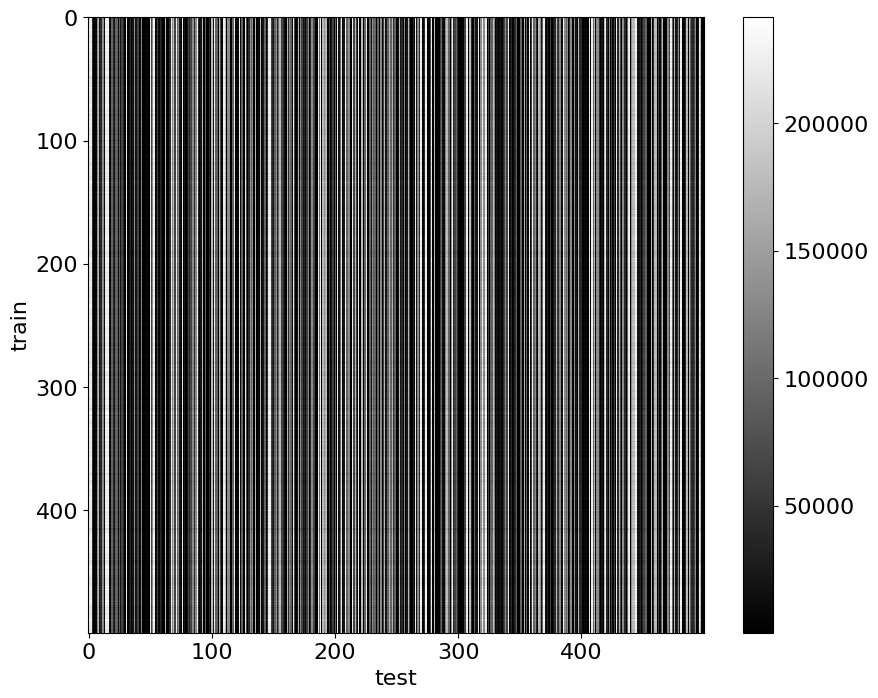

In [32]:
plt.imshow(dists.numpy() , cmap='gray' , interpolation='none')
plt.colorbar()
plt.xlabel('test')
plt.ylabel('train')
plt.show()

In [33]:
def compute_distances_one_loop(x_train, x_test):
  """
  Computes the squared Euclidean distance between each element of the training
  set and each element of the test set. Images should be flattened and treated
  as vectors.

  This implementation uses only a single loop over the training data.

  Inputs:
  - x_train: Torch tensor of shape (num_train, C, H, W)
  - x_test: Torch tensor of shape (num_test, C, H, W)

  Returns:
  - dists: Torch tensor of shape (num_train, num_test) where dists[i, j] is the
    squared Euclidean distance between the ith training point and the jth test
    point.
  """
  # Initialize dists to be a tensor of shape (num_train, num_test) with the
  # same datatype and device as x_train
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dists = x_train.new_zeros(num_train, num_test)
  ##############################################################################
  # TODO: Implement this function using only a single loop over x_train.       #
  #                                                                            #
  # You may not use torch.norm (or its instance method variant), nor any       #
  # functions from torch.nn or torch.nn.functional.                            #
  ##############################################################################
  # Replace "pass" statement with your code
  print(x_train.shape)
  x_test = x_test.view(num_test , -1)
  x_train = x_train.view(num_train , -1)
  print(x_train.shape)
  print(x_test.shape)
  print(x_train.shape)
  print("x_train[1] shaope: ",x_train[1].shape)
  print("x_test-x_train[1] shape:", (x_test-x_train[1]).shape)


  for i in range(num_train):
    dists[i] = torch.sum((x_test - x_train[i])**2 , dim=1).t()


  return dists


In [34]:
torch.manual_seed(0)

x_train_rand = torch.randn(100,3,16,16 , dtype=torch.float64)
x_test_rand = torch.randn(100,3,16,16 , dtype=torch.float64)

dists_one = compute_distances_one_loop(x_train_rand , x_test_rand)
dists_two = compute_distances_two_loops(x_train_rand , x_test_rand)

diff = (dists_one - dists_two).pow(2).sum().sqrt().item()

print('diff ' , diff)
if diff > 1e-4:
  print('Uh-oh! The distance matrices are different')
else:
  print('Good The distance matrices match')

torch.Size([100, 3, 16, 16])
torch.Size([100, 768])
torch.Size([100, 768])
torch.Size([100, 768])
x_train[1] shaope:  torch.Size([768])
x_test-x_train[1] shape: torch.Size([100, 768])
diff  1.6643380294540385e-11
Good The distance matrices match


In [35]:
def compute_distances_no_loops(x_train, x_test):
  """
  Computes the squared Euclidean distance between each element of the training
  set and each element of the test set. Images should be flattened and treated
  as vectors.

  This implementation should not use any Python loops. For memory-efficiency,
  it also should not create any large intermediate tensors; in particular you
  should not create any intermediate tensors with O(num_train*num_test)
  elements.

  Inputs:
  - x_train: Torch tensor of shape (num_train, C, H, W)
  - x_test: Torch tensor of shape (num_test, C, H, W)

  Returns:
  - dists: Torch tensor of shape (num_train, num_test) where dists[i, j] is the
    squared Euclidean distance between the ith training point and the jth test
    point.
  """
  # Initialize dists to be a tensor of shape (num_train, num_test) with the
  # same datatype and device as x_train
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dists = x_train.new_zeros(num_train, num_test)
  ##############################################################################
  # TODO: Implement this function without using any explicit loops and without #
  # creating any intermediate tensors with O(num_train * num_test) elements.   #
  #                                                                            #
  # You may not use torch.norm (or its instance method variant), nor any       #
  # functions from torch.nn or torch.nn.functional.                            #
  #                                                                            #
  # HINT: Try to formulate the Euclidean distance using two broadcast sums     #
  #       and a matrix multiply.                                               #
  ##############################################################################
  # Replace "pass" statement with your code
  x_test=x_test.view(num_test,-1)
  x_train=x_train.view(num_train,-1)
  dists=torch.sum(x_train**2,dim=1).view(-1,1)+torch.sum(x_test**2,dim=1).view(1,-1)-2*torch.mm(x_train,x_test.t())
  # print(dists.shape)

  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return dists

In [36]:
# we can now compute the speed of our three implementations
import time

def timeit(f,*args):
  tic = time.time()
  f(*args)
  toc = time.time()
  return toc - tic

torch.manual_seed(0)

x_train_rand = torch.randn(500,3,32,32)
x_test_rand = torch.randn(500,3,32,32)

two_loop_time = timeit(compute_distances_two_loops , x_train_rand , x_test_rand)

print('Two loop version took %.2f ' % two_loop_time)

one_loop_time = timeit(compute_distances_one_loop, x_train_rand, x_test_rand)
speedup = two_loop_time / one_loop_time
print('one loop version took %.2f secs (%.1fx speedup)' %(one_loop_time , speedup))

no_loop = timeit(compute_distances_no_loops , x_train_rand , x_test_rand)
speedup = two_loop_time / no_loop

print('no loop version took %.2f secs (%.1fx speedup)' % (no_loop , speedup))


Two loop version took 14.38 
torch.Size([500, 3, 32, 32])
torch.Size([500, 3072])
torch.Size([500, 3072])
torch.Size([500, 3072])
x_train[1] shaope:  torch.Size([3072])
x_test-x_train[1] shape: torch.Size([500, 3072])
one loop version took 1.15 secs (12.5x speedup)
no loop version took 0.07 secs (218.3x speedup)


In [74]:
def predict_labels(dists, y_train, k=1):
  """
  Given distances between all pairs of training and test samples, predict a
  label for each test sample by taking a majority vote among its k nearest
  neighbors in the training set.

  In the event of a tie, this function should return the smaller label. For
  example, if k=5 and the 5 nearest neighbors to a test example have labels
  [1, 2, 1, 2, 3] then there is a tie between 1 and 2 (each have 2 votes), so
  we should return 1 since it is the smaller label.

  Inputs:
  - dists: Torch tensor of shape (num_train, num_test) where dists[i, j] is the
    squared Euclidean distance between the ith training point and the jth test
    point.
  - y_train: Torch tensor of shape (y_train,) giving labels for all training
    samples. Each label is an integer in the range [0, num_classes - 1]
  - k: The number of nearest neighbors to use for classification.

  Returns:
  - y_pred: A torch int64 tensor of shape (num_test,) giving predicted labels
    for the test data, where y_pred[j] is the predicted label for the jth test
    example. Each label should be an integer in the range [0, num_classes - 1].
  """

  num_train , num_test = dists.shape
  y_pred = torch.zeros(num_test , dtype=torch.int64)

  for j in range(num_test):
    values , index = torch.topk(dists[:,j] , k , largest=False)
    modevalues , modeindex = torch.mode(y_train[index])
    y_pred[j] = modevalues

  return y_pred


In [75]:
class KnnClassifier:
  def __init__(self,x_train , y_train):
    """
    create k-nearest neighbout Classifier with the specified training data.
    In the initializer we simply memorize the provided training data

    Inputs:
    - x_train: Torch Tensor of shape (num_train , C,H,W) giving training data
    - y_train: int64 torch tensor of shape (num_train,) giving training labels
    """
    self.x_train = x_train.contiguous()
    self.y_train = y_train.contiguous()

  def predict(self , x_test , k=1):
    """
    Make predictions using the classifier.

    Inputs:
    - x_test: Torch tensor of shape (num_test, C, H, W) giving test samples
    - k: The number of neighbors to use for predictions

    Returns:
    - y_test_pred: Torch tensor of shape (num_test,) giving predicted labels
      for the test samples.
    """

    dists = compute_distances_no_loops(self.x_train , x_test.contiguous())
    y_test_pred = predict_labels(dists , self.y_train , k=k)

    return y_test_pred

  def check_accurcay(self,x_test , y_test , k=1 , quiet=False):
    """
    Utility method for checking the accuracy of this classifier on test data.
    Returns the accuracy of the classifier on the test data, and also prints a
    message giving the accuracy.

    Inputs:
    - x_test: Torch tensor of shape (num_test, C, H, W) giving test samples
    - y_test: int64 torch tensor of shape (num_test,) giving test labels
    - k: The number of neighbors to use for prediction
    - quiet: If True, don't print a message.

    Returns:
    - accuracy: Accuracy of this classifier on the test data, as a percent.
      Python float in the range [0, 100]
    """
    y_test_pred = self.predict(x_test , k=k)
    num_samples = x_test.shape[0]
    num_correct = (y_test == y_test_pred).sum().item()
    acc = 100 * num_correct / num_samples
    msg = (f'Got {num_correct} / {num_samples} correct;'
    f'accuracy is {acc:.2f}%'
           )
    if not quiet:
      print(msg)

    return acc


In [76]:
num_train  , num_test = 5000 , 500

x_train , y_train , x_test , y_test = coutils.data.cifar10(num_train , num_test)

classifier = KnnClassifier(x_train , y_train)

classifier.check_accurcay(x_test , y_test , k=5)

Got 139 / 500 correct;accuracy is 27.80%


27.8

In [77]:
# Cross-validation

def knn_cross_validate(x_train , y_train , num_folds=5 , k_choices=None):
  """
  Perform cross-validation for KnnClassifier.

  Inputs:
  - x_train: Tensor of shape (num_train, C, H, W) giving all training data
  - y_train: int64 tensor of shape (num_train,) giving labels for training data
  - num_folds: Integer giving the number of folds to use
  - k_choices: List of integers giving the values of k to try

  Returns:
  - k_to_accuracies: Dictionary mapping values of k to lists, where
    k_to_accuracies[k][i] is the accuracy on the ith fold of a KnnClassifier
    that uses k nearest neighbors.
  """
  if k_choices is None:
    # use default values
    k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

  # First we divide the training data into num_folds equally-sized folds

  x_train_folds = []
  y_train_folds = []
  ##############################################################################
  # TODO: Split the training data and images into folds. After splitting,      #
  # x_train_folds and y_train_folds should be lists of length num_folds, where #
  # y_train_folds[i] is the label vector for images in x_train_folds[i].       #
  # Hint: torch.chunk                                                          #
  ##############################################################################
  x_train_folds=torch.chunk(x_train, num_folds)
  y_train_folds=torch.chunk(y_train, num_folds)

  ##############################################################################
  #                            END OF YOUR CODE                                #
  ##############################################################################

  # A dictionary holding the accuracies for different values of k that we find
  # when running cross-validation. After running cross-validation,
  # k_to_accuracies[k] should be a list of length num_folds giving the different
  # accuracies we found when trying KnnClassifiers that use k neighbors.
  k_to_accuracies = {}

  ##############################################################################
  # TODO: Perform cross-validation to find the best value of k. For each value #
  # of k in k_choices, run the k-nearest-neighbor algorithm num_folds times;   #
  # in each case you'll use all but one fold as training data, and use the     #
  # last fold as a validation set. Store the accuracies for all folds and all  #
  # values in k in k_to_accuracies.   HINT: torch.cat                          #
  ##############################################################################

  for k in k_choices:

    k_to_accuracies[k] = []

    for i in range(num_folds):
      tmp = list(range(num_folds))
      tmp.pop(i)

      fx_test = x_train_folds[i]
      fy_test = y_train_folds[i]
      fx_train = torch.cat([x_train_folds[i] for j in tmp])
      fy_train = torch.cat([y_train_folds[i] for i in tmp])

      classifier = KnnClassifier(fx_train , fy_train)
      acc = classifier.check_accurcay(fx_test , fy_test , k=k , quiet=True)

      k_to_accuracies[k].append(acc)

  return k_to_accuracies

In [78]:
num_train = 5000
num_test = 500
x_train, y_train, x_test, y_test = coutils.data.cifar10(num_train, num_test)

k_to_accuracies = knn_cross_validate(x_train, y_train, num_folds=5)

for k, accs in sorted(k_to_accuracies.items()):
  print('k = %d got accuracies: %r' % (k, accs))

k = 1 got accuracies: [9.3, 9.3, 10.2, 10.0, 9.7]
k = 3 got accuracies: [10.0, 8.9, 9.3, 9.5, 10.6]
k = 5 got accuracies: [10.4, 10.0, 10.0, 8.8, 9.4]
k = 8 got accuracies: [9.9, 8.9, 9.5, 10.5, 10.7]
k = 10 got accuracies: [9.1, 9.7, 9.3, 10.6, 11.0]
k = 12 got accuracies: [7.9, 9.5, 11.0, 9.3, 9.8]
k = 15 got accuracies: [9.5, 8.4, 11.4, 7.7, 10.1]
k = 20 got accuracies: [7.0, 9.3, 10.0, 7.6, 11.2]
k = 50 got accuracies: [7.9, 10.3, 11.5, 8.3, 11.7]
k = 100 got accuracies: [8.5, 9.6, 9.7, 8.3, 10.6]


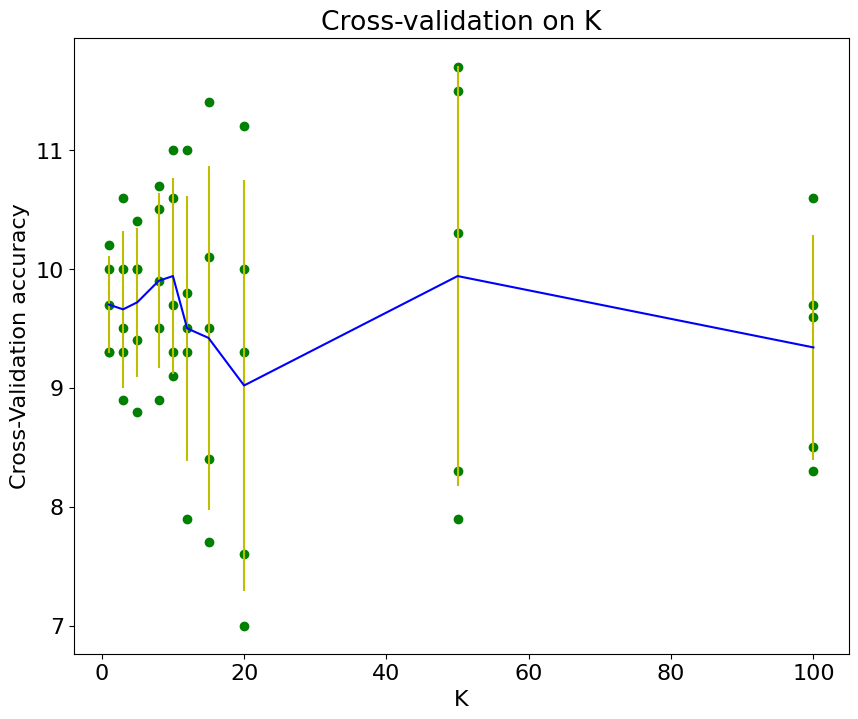

In [84]:
ks , means , stds = [] , [] , []

for k , accs in sorted(k_to_accuracies.items()):
  plt.scatter([k] * len(accs), accs ,color='g')
  ks.append(k)
  means.append(statistics.mean(accs))
  stds.append(statistics.stdev(accs))
plt.errorbar(ks, means, yerr=stds , color='b',ecolor='y')
plt.xlabel('K')
plt.ylabel('Cross-Validation accuracy')
plt.title('Cross-validation on K')
plt.show()

In [90]:
best_k = 1
##############################################################################
# TODO: Use the results of cross-validation stored in k_to_accuracies to     #
# choose the value of k, and store the result in best_k. You should choose   #
# the value of k that has the highest mean accuracy accross all folds.       #
##############################################################################
# Replace "pass" statement with your code
means=[]
for k, accs in sorted(k_to_accuracies.items()):
  means.append(statistics.mean(accs))
best_k=sorted(k_to_accuracies.items())[(torch.argmax(torch.tensor(means))).item()][0]
##############################################################################
#                            END OF YOUR CODE                                #
##############################################################################

print('Best k is ', best_k)
classifier = KnnClassifier(x_train, y_train)
classifier.check_accurcay(x_test, y_test, k=best_k)

Best k is  10
Got 141 / 500 correct;accuracy is 28.20%


28.2

In [87]:
sorted(k_to_accuracies.items())

[(1, [9.3, 9.3, 10.2, 10.0, 9.7]),
 (3, [10.0, 8.9, 9.3, 9.5, 10.6]),
 (5, [10.4, 10.0, 10.0, 8.8, 9.4]),
 (8, [9.9, 8.9, 9.5, 10.5, 10.7]),
 (10, [9.1, 9.7, 9.3, 10.6, 11.0]),
 (12, [7.9, 9.5, 11.0, 9.3, 9.8]),
 (15, [9.5, 8.4, 11.4, 7.7, 10.1]),
 (20, [7.0, 9.3, 10.0, 7.6, 11.2]),
 (50, [7.9, 10.3, 11.5, 8.3, 11.7]),
 (100, [8.5, 9.6, 9.7, 8.3, 10.6])]

In [88]:
sorted(k_to_accuracies.items())[2]

(5, [10.4, 10.0, 10.0, 8.8, 9.4])

In [ ]:
x_train_all, y_train_all, x_test_all, y_test_all = coutils.data.cifar10()
classifier = KnnClassifier(x_train_all, y_train_all)
classifier.check_accurcay(x_test_all, y_test_all, k=best_k)